In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,ShuffleSplit,StratifiedKFold

In [42]:
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [43]:
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [44]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [45]:
#check for duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

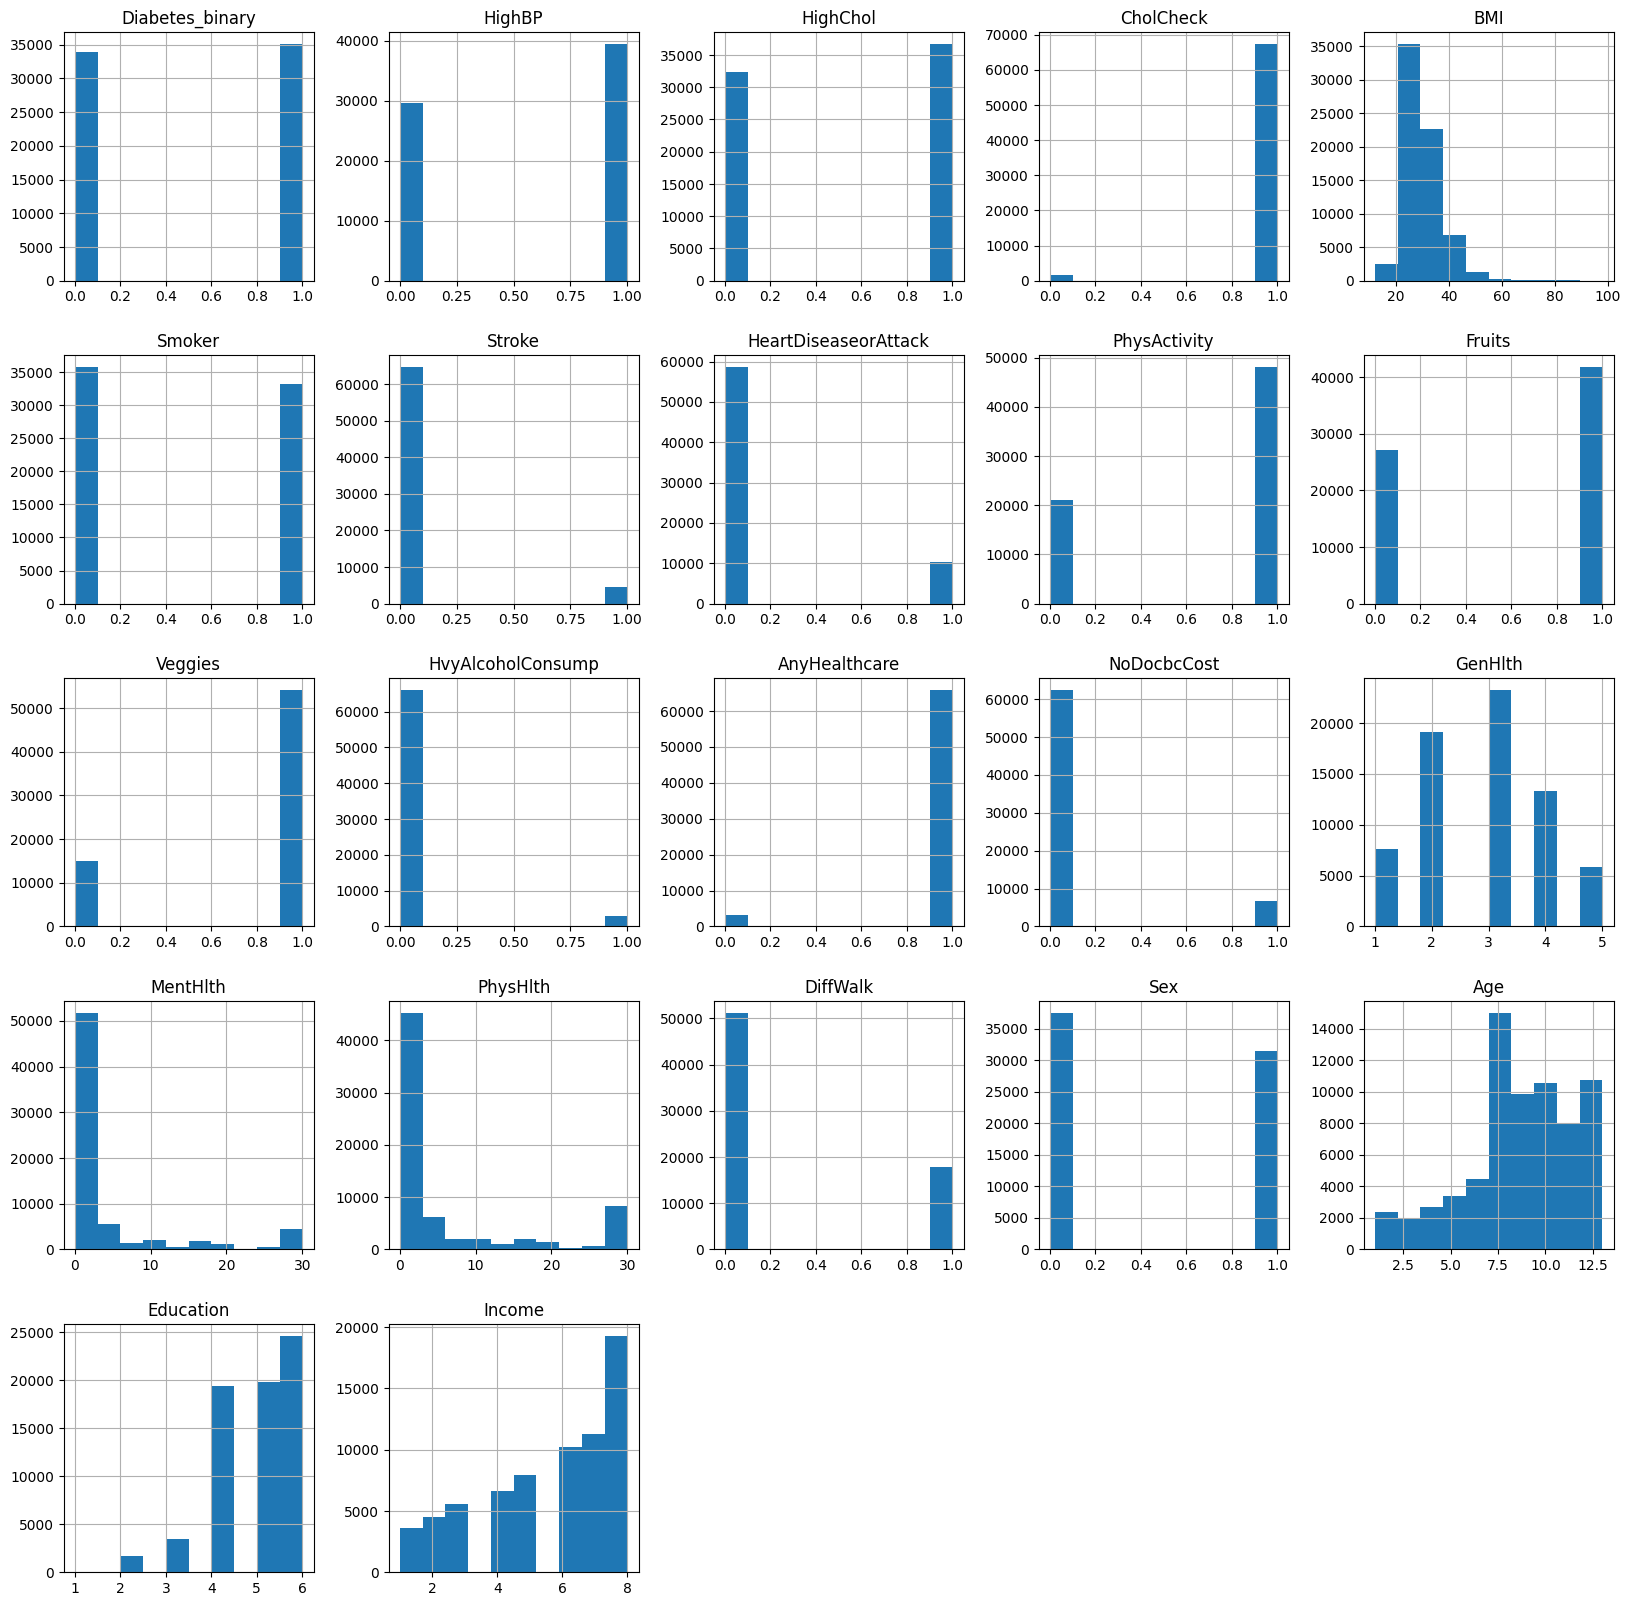

In [46]:
data.hist(figsize=(20,20))

Text(0.5, 1.0, 'Correlation Matrix')

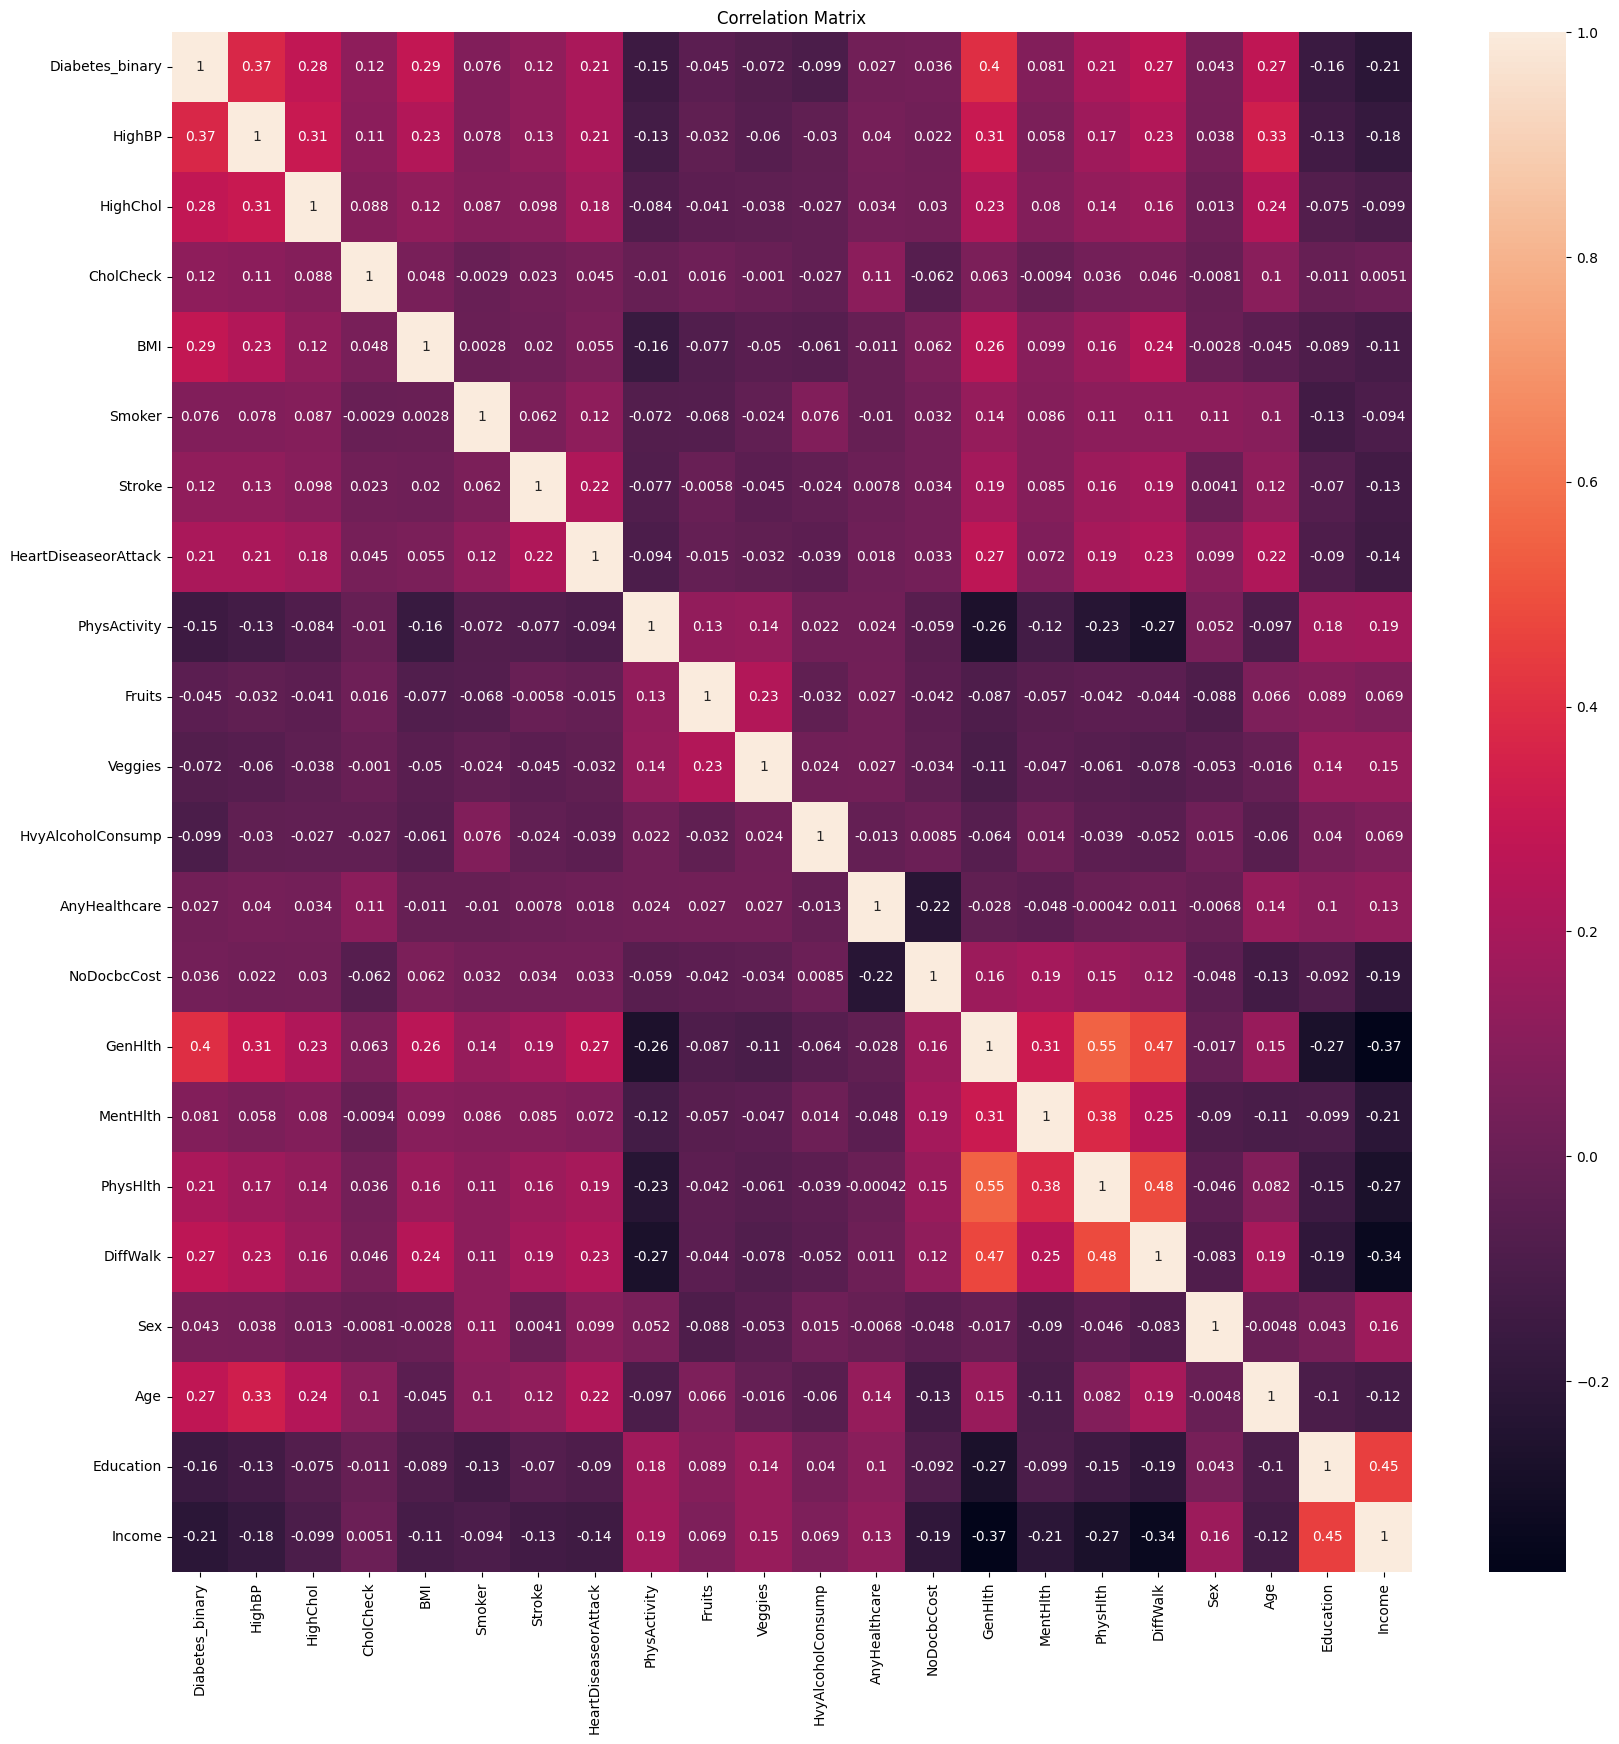

In [47]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')

In [48]:
corr_target = data.corrwith(data['Diabetes_binary'])
# plot corr_target
corr_target.plot(kind='bar', grid=False, figsize=(12, 8), title="Correlation with Diabetes_binary")

KeyError: 'Diabetes_012'

In [ ]:
#check for multiclass features
for col in data.columns:
    print(col, len(data[col].unique()))

Diabetes_012 3
HighBP 2
HighChol 2
CholCheck 2
BMI 84
Smoker 2
Stroke 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
AnyHealthcare 2
NoDocbcCost 2
GenHlth 5
MentHlth 31
PhysHlth 31
DiffWalk 2
Sex 2
Age 13
Education 6
Income 8


In [50]:
data.drop(['Income'], axis=1, inplace=True)

# Random Forest

In [51]:
X = data.drop(['Diabetes_binary'], axis=1)
Y = data['Diabetes_binary']

In [52]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [53]:
for train_index, test_index in kfold.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    rf = RandomForestClassifier(n_estimators=500, max_depth=10)
    
    rf.fit(X_train, Y_train)
    
    pred = rf.predict(X_test)
    
    print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      3396
         1.0       0.73      0.79      0.76      3510

    accuracy                           0.75      6906
   macro avg       0.75      0.75      0.75      6906
weighted avg       0.75      0.75      0.75      6906

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      3396
         1.0       0.73      0.79      0.76      3510

    accuracy                           0.75      6906
   macro avg       0.75      0.75      0.75      6906
weighted avg       0.75      0.75      0.75      6906

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      3396
         1.0       0.73      0.80      0.76      3510

    accuracy                           0.75      6906
   macro avg       0.75      0.75      0.75      6906
weighted avg       0.75      0.75      0.75      6906

              preci

In [54]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10)

In [55]:
rf_model.fit(X, Y)

RandomForestClassifier(max_depth=10, n_estimators=500)

In [57]:
import pickle
import joblib

In [58]:
# save the model to disk
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

# K means

In [59]:
def find_best_k(X):
    sse = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.plot(range(1, 10), sse)
    plt.show()

In [61]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

In [63]:
clustering = KMeans(n_clusters=2,n_init='auto')
clustering.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [64]:
silhouette_score(X, clustering.labels_)

0.5628757637171051